***
***
# Comprobación de la FFT por Diezmado en Python
***
***
Integrantes:
- Dafne Valeria Castellanos
- Laura Valentina Gonzalez
***
***
El código carga un archivo .mat que contiene señales (t, y1, y2, y3). Utiliza la biblioteca scipy.io para cargar el archivo. Luego, itera sobre las señales y aplica la FFT por diezmado a cada una. Calcula el número de puntos de la FFT asegurándose de que sea una potencia de 2. Luego, realiza la FFT, escala los resultados y calcula el vector de frecuencia. Finalmente, muestra los resultados en gráficos utilizando la biblioteca matplotlib.pyplot.

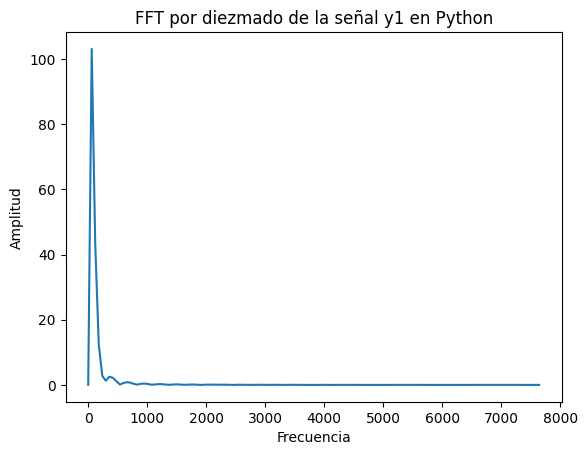

In [6]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

def fft_diezmado(filename):
    # Cargar las señales desde el archivo .mat
    data = scipy.io.loadmat(filename)
    t = data['t'].flatten()
    y1 = data['y1'].flatten()
    y2 = data['y2'].flatten()
    y3 = data['y3'].flatten()

    # Calcular la FFT por diezmado para cada señal
    signals = [y1, y2, y3]
    for i, signal in enumerate(signals):
        N = len(signal)

        # Calcular el número de puntos de la FFT
        N_fft = 2 ** int(np.ceil(np.log2(N)))

        # Asegurarse de que N_fft sea una potencia de 2
        if N_fft < N:
            N_fft = N_fft * 2;

        # Aplicar la FFT por diezmado
        fft_result = np.fft.fft(signal, N_fft) / N
        fft_result = fft_result[:N_fft//2+1]
        fft_result[1:-1] *= 2

        # Calcular el vector de frecuencia
        f = np.arange(N_fft//2 + 1) / (N * t[1])

        # Mostrar el resultado
        plt.figure()
        plt.plot(f, np.abs(fft_result))
        plt.xlabel('Frecuencia')
        plt.ylabel('Amplitud')
        plt.title(f'FFT por diezmado de la señal y{i+1} en Python')

    plt.show()

# Llamar a la función y pasar el nombre del archivo .mat
fft_diezmado('data.mat')


***
***